# Design of Experiment (DOE) and Supervised Learning

In [1]:
import pandas as pd
import numpy as np
import os

csv_path = os.path.join('..', 'dataset', 'dataset_ur3_cobotops.csv')
df = pd.read_csv(csv_path)

## 1. Exploratory Data Analysis

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7409 entries, 0 to 7408
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Num                   7409 non-null   int64  
 1   Timestamp             7409 non-null   object 
 2   Current_J0            7363 non-null   float64
 3   Temperature_T0        7355 non-null   float64
 4   Current_J1            7355 non-null   float64
 5   Temperature_J1        7355 non-null   float64
 6   Current_J2            7355 non-null   float64
 7   Temperature_J2        7355 non-null   float64
 8   Current_J3            7355 non-null   float64
 9   Temperature_J3        7355 non-null   float64
 10  Current_J4            7355 non-null   float64
 11  Temperature_J4        7355 non-null   float64
 12  Current_J5            7355 non-null   float64
 13  Temperature_J5        7355 non-null   float64
 14  Speed_J0              7355 non-null   float64
 15  Speed_J1             

In [3]:
df.describe()

,Num,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Current_J4,...,Temperature_J5,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop
count,7409.000000,7363.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,...,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7409.000000,7355.000000
mean,3705.000000,-0.048934,34.906781,-2.297936,37.659636,-1.199381,38.064064,-0.605312,40.936999,-0.022968,...,41.891094,0.001671,0.000061,0.003791,-0.004610,-0.000810,0.002880,0.109527,141.113241,0.037797
std,2138.938405,0.829395,2.762057,0.800450,3.247315,0.609984,3.311948,0.514937,3.182399,0.630789,...,3.680003,0.148826,0.049370,0.729422,0.359999,0.038436,0.313953,0.078832,80.542340,0.190719
min,1.000000,-6.247756,27.812500,-5.808734,29.312500,-4.171966,29.375000,-3.333102,32.125000,-4.738406,...,32.000000,-0.656331,-0.330833,-2.733091,-1.271460,-0.226233,-1.629721,0.020180,1.000000,0.000000
25%,1853.000000,-0.195026,33.000000,-2.664919,35.375000,-1.552803,35.750000,-0.830933,38.937500,-0.125809,...,39.500000,-0.000483,-0.000659,-0.004100,-0.005365,-0.000120,-0.000803,0.082387,68.000000,0.000000
50%,3705.000000,-0.080830,36.500000,-2.236342,39.687500,-1.077137,40.187500,-0.571190,43.062500,-0.012325,...,44.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085192,154.000000,0.000000
75%,5557.000000,0.095959,37.062500,-1.778334,40.125000,-0.838721,40.437500,-0.388398,43.125000,0.086098,...,44.500000,0.002115,0.000540,0.000205,0.009912,0.000066,0.012924,0.089518,218.000000,0.000000
max,7409.000000,6.806938,37.250000,1.083596,40.500000,2.464940,40.937500,2.270268,43.437500,4.089389,...,44.937500,0.791929,0.615526,2.679848,1.363093,0.193914,1.378015,0.602054,264.000000,1.000000


In [4]:
target_columns = ['grip_lost', 'Robot_ProtectiveStop']

numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns.drop(['Timestamp'])

numerical_features = df[numerical_columns].columns.difference(target_columns)
categorical_features = df[categorical_columns].columns.difference(target_columns)

print("Columns: ", df.columns)
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

# Dalam kasus ini, kolom target adalah 'Robot_ProtectiveStop' dan 'grip_lost'. Kedua target berperilaku sebagai boolean (binary classification).
# Namun, kolom 'Robot_ProtectiveStop' dinyatakan dalam bentuk numerik (0 dan 1).
# Dataset secara mentah tidak memiliki fitur kategorikal.
# Fitur 'Timestamp' masih dalam bentuk string dan perlu diubah menjadi tipe datetime pada tahap preprocessing.

Columns:  Index(['Num', 'Timestamp', 'Current_J0', 'Temperature_T0', 'Current_J1',
       'Temperature_J1', 'Current_J2', 'Temperature_J2', 'Current_J3',
       'Temperature_J3', 'Current_J4', 'Temperature_J4', 'Current_J5',
       'Temperature_J5', 'Speed_J0', 'Speed_J1', 'Speed_J2', 'Speed_J3',
       'Speed_J4', 'Speed_J5', 'Tool_current', 'cycle ',
       'Robot_ProtectiveStop', 'grip_lost'],
      dtype='object')
Numerical Columns: Index(['Num', 'Current_J0', 'Temperature_T0', 'Current_J1', 'Temperature_J1',
       'Current_J2', 'Temperature_J2', 'Current_J3', 'Temperature_J3',
       'Current_J4', 'Temperature_J4', 'Current_J5', 'Temperature_J5',
       'Speed_J0', 'Speed_J1', 'Speed_J2', 'Speed_J3', 'Speed_J4', 'Speed_J5',
       'Tool_current', 'cycle ', 'Robot_ProtectiveStop'],
      dtype='object')
Categorical Columns: Index(['grip_lost'], dtype='object')


In [5]:
if not categorical_columns.empty:
    df[categorical_columns].nunique()

In [6]:
if not categorical_columns.empty:
    df[categorical_columns].value_counts()

In [7]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': missing_percentage
})

missing_df

,Column,Missing Count,Missing Percentage
Num,Num,0,0.000000
Timestamp,Timestamp,0,0.000000
Current_J0,Current_J0,46,0.620867
Temperature_T0,Temperature_T0,54,0.728843
Current_J1,Current_J1,54,0.728843
Temperature_J1,Temperature_J1,54,0.728843
Current_J2,Current_J2,54,0.728843
Temperature_J2,Temperature_J2,54,0.728843
Current_J3,Current_J3,54,0.728843
Temperature_J3,Temperature_J3,54,0.728843


In [8]:
df[df['Robot_ProtectiveStop'].isna()]

,Num,Timestamp,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,...,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
813,814,2022-10-26T08:31:00.829Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,NaN,False
947,948,2022-10-26T08:33:15.550Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,NaN,False
976,977,2022-10-26T08:33:44.702Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,NaN,False
1046,1047,2022-10-26T08:34:55.110Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,NaN,False
1315,1316,2022-10-26T08:40:05.795Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49,NaN,False
2089,2090,"""2022-10-26T08:53:11.129Z""",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79,NaN,False
2237,2238,"""2022-10-26T08:55:40.880Z""",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84,NaN,False
2316,2317,2022-10-26T08:57:00.305Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86,NaN,False
2392,2393,2022-10-26T08:58:16.761Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89,NaN,False
2668,2669,2022-10-26T09:02:56.217Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99,NaN,False


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 7
print('Visualization libraries imported successfully!')

Visualization libraries imported successfully!


In [10]:
# df.hist(bins=20, figsize=(15, 15), edgecolor='black', alpha=0.7)
# plt.suptitle('Histograms of Numerical Features')
# plt.show()

In [11]:
# # Box plots
# n_cols = 6
# n_rows = (len(numerical_columns) + n_cols - 1) // n_cols
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3*n_rows))
# if n_rows == 1:
#     axes = axes.reshape(1, -1)
# axes = axes.flatten()

# for i, col in enumerate(numerical_columns):
#     axes[i].boxplot(df[col].dropna())
#     axes[i].set_title(col)
#     axes[i].set_ylabel(col)
#     axes[i].grid(True, alpha=0.3)

# # Remove empty subplots
# for i in range(len(numerical_columns), len(axes)):
#     fig.delaxes(axes[i])

# plt.tight_layout()
# plt.show()

In [12]:
# def detect_outliers_iqr(df, column):
#     """Detect outliers using IQR method"""
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
#     return outliers, lower_bound, upper_bound

# def detect_outliers_zscore(df, column, threshold=3):
#     """Detect outliers using Z-score method"""
#     col_data = df[column]
#     non_null = col_data.dropna()
#     z_scores = np.abs(stats.zscore(non_null))
#     outlier_mask = (z_scores > threshold)
#     outliers = df.loc[non_null.index[outlier_mask]]
#     return outliers

# print("OUTLIER DETECTION RESULTS")
# print("=" * 50)

# outlier_summary = []

# for col in numerical_columns:
#     # IQR method
#     outliers_iqr, lower, upper = detect_outliers_iqr(df, col)
#     iqr_count = len(outliers_iqr)
#     iqr_percentage = iqr_count / len(df) * 100
    
#     # Z-score method
#     outliers_zscore = detect_outliers_zscore(df, col)
#     zscore_count = len(outliers_zscore)
#     zscore_percentage = zscore_count / len(df) * 100
    
#     outlier_summary.append({
#         'Feature': col,
#         'IQR_Outliers_Count': iqr_count,
#         'IQR_Outliers_Percentage': iqr_percentage,
#         'ZScore_Outliers_Count': zscore_count,
#         'ZScore_Outliers_Percentage': zscore_percentage
#     })

# outlier_df = pd.DataFrame(outlier_summary)
# outlier_df

In [13]:
# corr_matrix = df.corr(numeric_only=True)

# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# plt.title('Correlation Heatmap')
# plt.show()

In [14]:
# # Scatter plot against target columns

# df_float_target = df.copy()
# df_float_target[target_columns] = df[target_columns].astype(float)

# n_features = len(numerical_features)
# n_targets = len(target_columns)
# n_cols = 6
# n_rows = (n_features + n_cols - 1) // n_cols

# fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 3*n_rows))
# if n_rows == 1:
#     axes = axes.reshape(1, -1)
# axes = axes.flatten()

# for i, feature in enumerate(numerical_features):
#     for j, target in enumerate(target_columns):
#         if j == 0:
#             color = 'blue'
#             size = 10
#         else:
#             color = 'red'
#             size = 5
#         alpha = 0.3

#         axes[i].scatter(df_float_target[feature], df_float_target[target],
#                        c=color, alpha=alpha, s=size, label=target)

#     axes[i].set_xlabel(feature)
#     axes[i].set_ylabel('Target Values')
#     axes[i].set_title(f'{feature} vs Targets')
#     axes[i].legend()
#     axes[i].grid(True, alpha=0.3)

# for i in range(n_features, len(axes)):
#     fig.delaxes(axes[i])

# plt.tight_layout()
# plt.show()


In [15]:
# from pandas.plotting import scatter_matrix

# # Create a copy of the dataframe with float targets for plotting
# df_float_target = df.copy()
# df_float_target[target_columns] = df[target_columns].astype(float)
# df_float_target = df_float_target.dropna()

# # --- Plot 1: Scatter Matrix colored by 'grip_lost' ---
# axes1 = scatter_matrix(df_float_target[numerical_features],
#                        c=df_float_target['grip_lost'].map({0: 'cyan', 1: 'red'}),
#                        alpha=0.6,
#                        figsize=(15, 15),
#                        diagonal='hist')

# # Add a title to the entire figure
# plt.suptitle('Scatter Matrix - Colored by grip_lost (0=cyan, 1=red)', fontsize=16, y=0.95)
# plt.show()

# # --- Plot 2: Scatter Matrix colored by 'Robot_ProtectiveStop' ---
# axes2 = scatter_matrix(df_float_target[numerical_features],
#                        c=df_float_target['Robot_ProtectiveStop'].map({0: 'cyan', 1: 'red'}),
#                        alpha=0.6,
#                        figsize=(15, 15),
#                        diagonal='hist')


# # Add a title to this figure
# plt.suptitle('Scatter Matrix - Colored by Robot_ProtectiveStop (0=cyan, 1=red)', fontsize=16, y=0.95)
# plt.show()

## 2. Data Preprocessing

In [16]:
df_processed = df.copy()
if df_processed['Timestamp'].dtype == 'object':
    df_processed['Timestamp'] = pd.to_datetime(df_processed['Timestamp'].str.strip('"'), errors='raise')
    
df_processed

,Num,Timestamp,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,...,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
0,1,2022-10-26 08:17:21.847000+00:00,0.109628,27.8750,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,...,2.955651e-01,-0.000490,0.001310,-0.132836,-0.007479,-0.152962,0.082732,1,0.0,False
1,2,2022-10-26 08:17:22.852000+00:00,0.595605,27.8750,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,...,-7.391485e-30,-0.000304,0.002185,0.001668,-0.000767,0.000417,0.505895,1,0.0,False
2,3,2022-10-26 08:17:23.857000+00:00,-0.229474,27.8750,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,...,1.369386e-01,0.007795,-2.535874,0.379867,0.000455,-0.496856,0.079420,1,0.0,False
3,4,2022-10-26 08:17:24.863000+00:00,0.065053,27.8750,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,...,-9.030032e-02,-0.004911,-0.009096,-0.384196,0.018411,0.425559,0.083325,1,0.0,False
4,5,2022-10-26 08:17:25.877000+00:00,0.884140,27.8750,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,...,1.268088e-01,0.005567,0.001138,-0.353284,0.014994,0.180989,0.086379,1,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,7405,2022-10-26 15:36:02.555000+00:00,-0.109017,37.1875,-2.261695,40.3125,-1.082678,40.6875,-0.494714,43.3750,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.080013,264,0.0,False
7405,7406,2022-10-26 15:36:03.562000+00:00,-0.098536,37.1875,-2.251992,40.3125,-1.094420,40.6875,-0.515789,43.3750,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.078740,264,0.0,False
7406,7407,2022-10-26 15:36:04.571000+00:00,-0.121100,37.1875,-2.280791,40.2500,-1.121319,40.6875,-0.502406,43.3750,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.091471,264,0.0,False
7407,7408,2022-10-26 15:36:05.572000+00:00,-0.129370,37.1875,-2.269061,40.3125,-1.091610,40.6250,-0.491158,43.3750,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.090026,264,0.0,False


In [17]:
df_processed = df_processed.dropna()
df_processed

# Row yang memiliki missing values hanya sedikit dan hanya terjadi pada kolom 'Robot_ProtectiveStop' yang memiliki missing value.
# Sehingga, bisa di-drop.

,Num,Timestamp,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,...,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
0,1,2022-10-26 08:17:21.847000+00:00,0.109628,27.8750,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,...,2.955651e-01,-0.000490,0.001310,-0.132836,-0.007479,-0.152962,0.082732,1,0.0,False
1,2,2022-10-26 08:17:22.852000+00:00,0.595605,27.8750,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,...,-7.391485e-30,-0.000304,0.002185,0.001668,-0.000767,0.000417,0.505895,1,0.0,False
2,3,2022-10-26 08:17:23.857000+00:00,-0.229474,27.8750,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,...,1.369386e-01,0.007795,-2.535874,0.379867,0.000455,-0.496856,0.079420,1,0.0,False
3,4,2022-10-26 08:17:24.863000+00:00,0.065053,27.8750,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,...,-9.030032e-02,-0.004911,-0.009096,-0.384196,0.018411,0.425559,0.083325,1,0.0,False
4,5,2022-10-26 08:17:25.877000+00:00,0.884140,27.8750,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,...,1.268088e-01,0.005567,0.001138,-0.353284,0.014994,0.180989,0.086379,1,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,7405,2022-10-26 15:36:02.555000+00:00,-0.109017,37.1875,-2.261695,40.3125,-1.082678,40.6875,-0.494714,43.3750,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.080013,264,0.0,False
7405,7406,2022-10-26 15:36:03.562000+00:00,-0.098536,37.1875,-2.251992,40.3125,-1.094420,40.6875,-0.515789,43.3750,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.078740,264,0.0,False
7406,7407,2022-10-26 15:36:04.571000+00:00,-0.121100,37.1875,-2.280791,40.2500,-1.121319,40.6875,-0.502406,43.3750,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.091471,264,0.0,False
7407,7408,2022-10-26 15:36:05.572000+00:00,-0.129370,37.1875,-2.269061,40.3125,-1.091610,40.6250,-0.491158,43.3750,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.090026,264,0.0,False


In [18]:
df_processed = df_processed.astype({
    'grip_lost': int,
    'Robot_ProtectiveStop': int
})
df_processed

,Num,Timestamp,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,...,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
0,1,2022-10-26 08:17:21.847000+00:00,0.109628,27.8750,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,...,2.955651e-01,-0.000490,0.001310,-0.132836,-0.007479,-0.152962,0.082732,1,0,0
1,2,2022-10-26 08:17:22.852000+00:00,0.595605,27.8750,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,...,-7.391485e-30,-0.000304,0.002185,0.001668,-0.000767,0.000417,0.505895,1,0,0
2,3,2022-10-26 08:17:23.857000+00:00,-0.229474,27.8750,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,...,1.369386e-01,0.007795,-2.535874,0.379867,0.000455,-0.496856,0.079420,1,0,0
3,4,2022-10-26 08:17:24.863000+00:00,0.065053,27.8750,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,...,-9.030032e-02,-0.004911,-0.009096,-0.384196,0.018411,0.425559,0.083325,1,0,0
4,5,2022-10-26 08:17:25.877000+00:00,0.884140,27.8750,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,...,1.268088e-01,0.005567,0.001138,-0.353284,0.014994,0.180989,0.086379,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,7405,2022-10-26 15:36:02.555000+00:00,-0.109017,37.1875,-2.261695,40.3125,-1.082678,40.6875,-0.494714,43.3750,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.080013,264,0,0
7405,7406,2022-10-26 15:36:03.562000+00:00,-0.098536,37.1875,-2.251992,40.3125,-1.094420,40.6875,-0.515789,43.3750,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.078740,264,0,0
7406,7407,2022-10-26 15:36:04.571000+00:00,-0.121100,37.1875,-2.280791,40.2500,-1.121319,40.6875,-0.502406,43.3750,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.091471,264,0,0
7407,7408,2022-10-26 15:36:05.572000+00:00,-0.129370,37.1875,-2.269061,40.3125,-1.091610,40.6250,-0.491158,43.3750,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.090026,264,0,0


In [19]:
# df_processed.plot(x='Timestamp', subplots=True, figsize=(15, 24), grid=True, title='Time Series Data')
# plt.show()

## 3. Modelling and Evaluation

In [20]:
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, classification_report, confusion_matrix

from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import matplotlib.pyplot as plt

In [21]:
X, y = df_processed[numerical_features], df_processed[target_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
def hold_out_validation(model, X, y, plot_roc=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    for y_col in y.columns:
        print('=' * 60)
        print(f"Hold-Out Validation for {y_col}:")
        print('=' * 60)
        model.fit(X_train.values, y_train[y_col].values)
        y_pred = model.predict(X_test.values)

        print(classification_report(y_test[y_col], y_pred))

        cm = confusion_matrix(y_test[y_col], y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix - {y_col}')
        plt.show()

        # Add ROC AUC plot
        if plot_roc:
            try:
                # Get probabilities
                if hasattr(model, 'predict_proba'):
                    y_probs = model.predict_proba(X_test.values)[:, 1]
                elif hasattr(model, 'decision_function'):
                    y_probs = model.decision_function(X_test.values)
                else:
                    print("Model doesn't support probability prediction - skipping ROC plot")
                    continue
                
                # Calculate ROC
                fpr, tpr, _ = roc_curve(y_test[y_col], y_probs)
                auc_score = roc_auc_score(y_test[y_col], y_probs)
                
                # Plot ROC curve
                plt.figure(figsize=(6, 5))
                plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}', linewidth=2)
                plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.title(f'ROC Curve - {y_col}')
                plt.legend()
                plt.grid(True, alpha=0.3)
                plt.show()
                
                print(f"AUC-ROC: {auc_score:.4f}")
                
            except Exception as e:
                print(f"Could not plot ROC curve: {e}")
        print()

def k_fold_cross_validation(model, X, y, k=5, roc_auc=False):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    for y_col in y.columns:
        print('=' * 60)
        print(f"Cross Validation for {y_col}:")
        print('=' * 60)

        scorers = ['precision', 'recall', 'f1']
        if roc_auc:
            scorers.append('roc_auc')
        # cv_results = cross_validate(model, X.values, y[y_col].values, cv=kf, scoring=['precision', 'recall', 'f1', 'roc_auc'])
        cv_results = cross_validate(model, X.values, y[y_col].values, cv=kf, scoring=scorers)

        print(f"Model Performance ({k}-Fold Cross Validation):")

        for key, value in cv_results.items():
            print(f"\n{key}: {value}")
            if key.startswith('test_'):
                print(f"Average {key}: {np.mean(value):.2f}")
        print()

### 3.1 KNN

In [23]:
from supervised_learning.knn import KNNClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [24]:
# custom_model = KNNClassifier(k=5, distance_method='euclidean')

# pipeline = ImbPipeline([
#     # ('smote', SMOTE(random_state=42)),
#     ('knn', custom_model)
# ])

# hold_out_validation(pipeline, X, y, plot_roc=True)

In [25]:
# sklearn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# pipeline = ImbPipeline([
#     # ('smote', SMOTE(random_state=42)),
#     # ('scaler', StandardScaler()),
#     ('knn', sklearn_model)
# ])

# hold_out_validation(pipeline, X, y, plot_roc=True)

In [26]:
# custom_model = KNNClassifier(k=5, distance_method='euclidean')

# pipeline = Pipeline([
#     # ('smote', SMOTE(random_state=42)),
#     ('knn', custom_model)
# ])

# k_fold_cross_validation(pipeline, X, y, k = 5)

In [27]:
# sklearn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# pipeline = ImbPipeline([
#     # ('smote', SMOTE(random_state=42)),
#     ('knn', sklearn_model)
# ])

# k_fold_cross_validation(pipeline, X, y, k=5, roc_auc=True)

### 3.2 Logistic Regression

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from supervised_learning.logistic_regression import LogisticRegressionClassifier

Hold-Out Validation for grip_lost:
Iteration 0: Cost 0.7941571311495722
              precision    recall  f1-score   support

           0       0.98      0.70      0.81      1414
           1       0.08      0.63      0.14        57

    accuracy                           0.69      1471
   macro avg       0.53      0.66      0.48      1471
weighted avg       0.94      0.69      0.79      1471



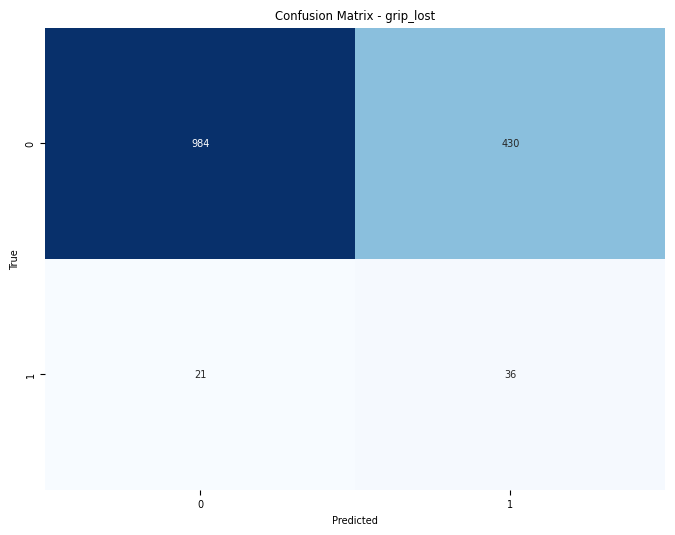

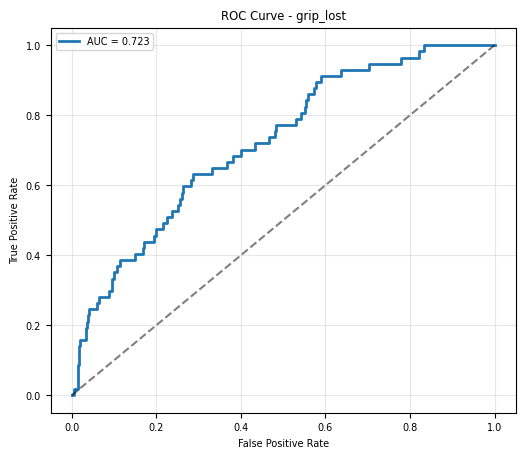

AUC-ROC: 0.7229

Hold-Out Validation for Robot_ProtectiveStop:
Iteration 0: Cost 0.7377064725929257
              precision    recall  f1-score   support

           0       0.98      0.70      0.82      1403
           1       0.10      0.69      0.18        68

    accuracy                           0.70      1471
   macro avg       0.54      0.70      0.50      1471
weighted avg       0.94      0.70      0.79      1471



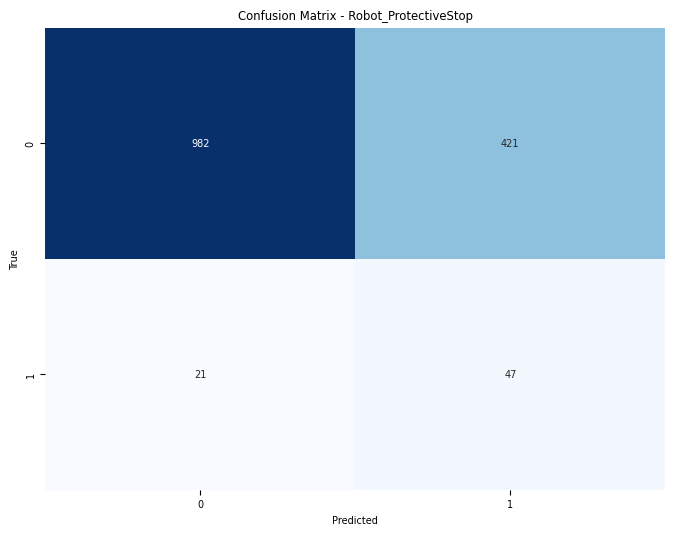

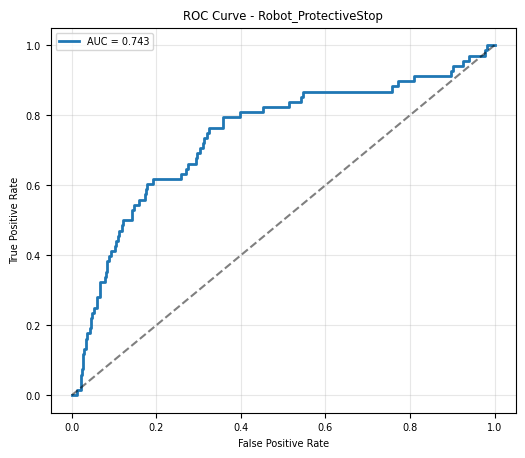

AUC-ROC: 0.7434

Cross Validation for grip_lost:
Iteration 0: Cost 0.7941571311495719
Iteration 0: Cost 0.7600558337287409
Iteration 0: Cost 0.7938633391476438
Iteration 0: Cost 0.779355021250499
Iteration 0: Cost 0.7824557181928461
Model Performance (5-Fold Cross Validation):

fit_time: [0.01653433 0.01532316 0.01402283 0.01411057 0.01550627]

score_time: [0.00699735 0.00725269 0.00783539 0.00841975 0.00601149]

test_precision: [0.07725322 0.08230453 0.06593407 0.0661157  0.06436782]
Average test_precision: 0.07

test_recall: [0.63157895 0.71428571 0.68181818 0.76190476 0.63636364]
Average test_recall: 0.69

test_f1: [0.1376673  0.14760148 0.12024048 0.121673   0.11691023]
Average test_f1: 0.13

Cross Validation for Robot_ProtectiveStop:
Iteration 0: Cost 0.7377064725929244
Iteration 0: Cost 0.735573620139817
Iteration 0: Cost 0.7311896281220454
Iteration 0: Cost 0.7388472449109027
Iteration 0: Cost 0.7287086106825674
Model Performance (5-Fold Cross Validation):

fit_time: [0.01900291

In [29]:
logistic_pipeline_custom = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegressionClassifier(
        learning_rate=1.0,
        class_weight='balanced',
        max_iter=100,
        regularization_term='l2',
        lambda_reg=0.1
    ))
])

hold_out_validation(logistic_pipeline_custom, X, y, plot_roc=True)
k_fold_cross_validation(logistic_pipeline_custom, X, y, k=5)

Hold-Out Validation for grip_lost:
              precision    recall  f1-score   support

           0       0.98      0.70      0.82      1414
           1       0.08      0.61      0.14        57

    accuracy                           0.70      1471
   macro avg       0.53      0.66      0.48      1471
weighted avg       0.94      0.70      0.79      1471



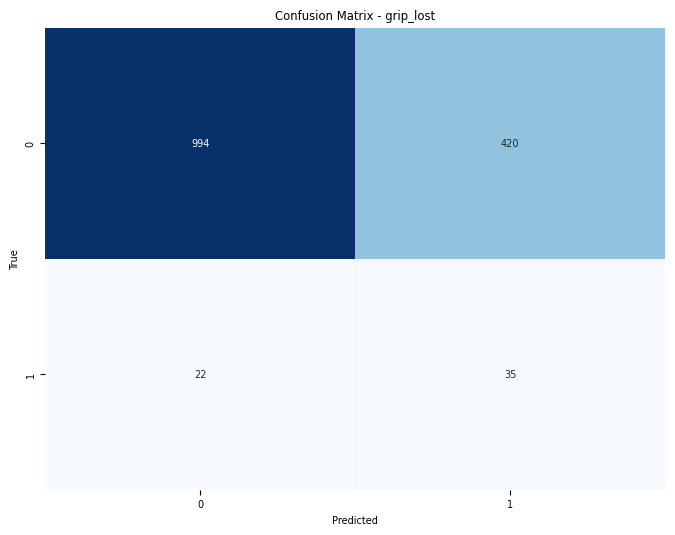

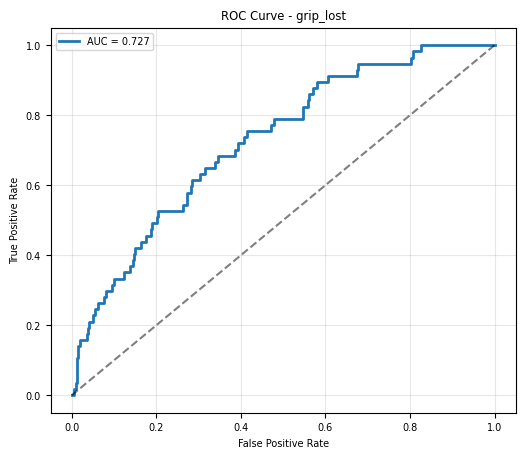

AUC-ROC: 0.7271

Hold-Out Validation for Robot_ProtectiveStop:
              precision    recall  f1-score   support

           0       0.98      0.70      0.82      1403
           1       0.11      0.72      0.18        68

    accuracy                           0.71      1471
   macro avg       0.54      0.71      0.50      1471
weighted avg       0.94      0.71      0.79      1471



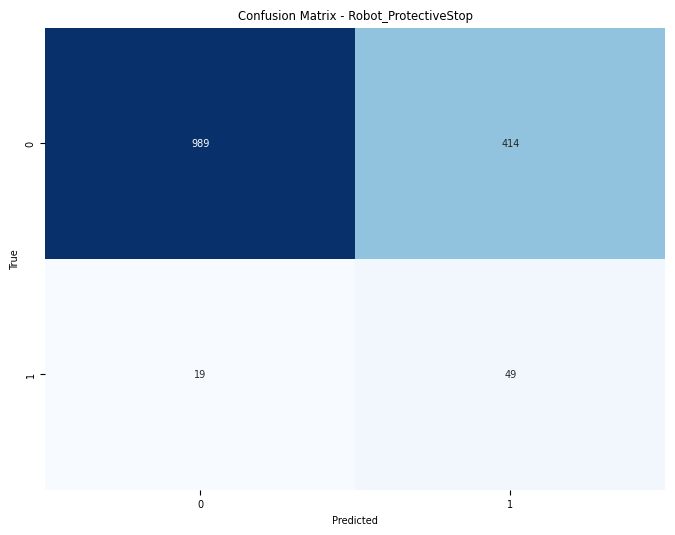

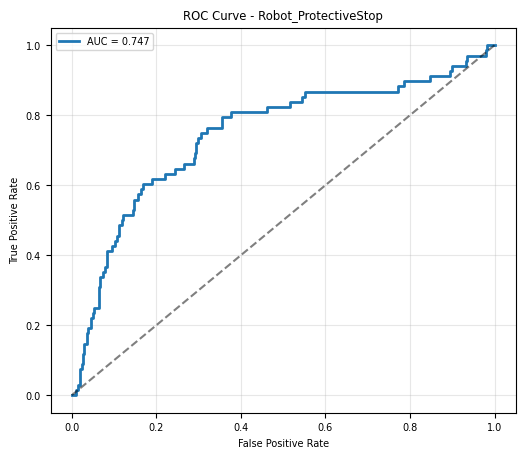

AUC-ROC: 0.7470

Cross Validation for grip_lost:
Model Performance (5-Fold Cross Validation):

fit_time: [0.02874303 0.02577877 0.01866007 0.04977608 0.02536941]

score_time: [0.00532269 0.00519013 0.01513481 0.00575471 0.0043242 ]

test_precision: [0.07692308 0.08613445 0.06651885 0.06694561 0.06839623]
Average test_precision: 0.07

test_recall: [0.61403509 0.73214286 0.68181818 0.76190476 0.65909091]
Average test_recall: 0.69

test_f1: [0.13671875 0.15413534 0.12121212 0.12307692 0.12393162]
Average test_f1: 0.13

Cross Validation for Robot_ProtectiveStop:
Model Performance (5-Fold Cross Validation):

fit_time: [0.01967001 0.02117682 0.02112699 0.0223012  0.02000546]

score_time: [0.00529218 0.00500131 0.00400066 0.00551629 0.00449467]

test_precision: [0.10583153 0.07438017 0.09958506 0.07517084 0.08385744]
Average test_precision: 0.09

test_recall: [0.72058824 0.67924528 0.8        0.70212766 0.8       ]
Average test_recall: 0.74

test_f1: [0.18455744 0.13407821 0.17712177 0.135802

In [30]:
logistic_pipeline_sklearn = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(
        max_iter=100,
        solver='liblinear',
        random_state=42,
        class_weight='balanced',
        penalty='l2',
        C=0.1
    ))
])

hold_out_validation(logistic_pipeline_sklearn, X, y, plot_roc=True)
k_fold_cross_validation(logistic_pipeline_sklearn, X, y, k=5)

### 3.3 Gaussian Naive Bayes

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from supervised_learning.gaussian_naive_bayes import GaussianNaiveBayesClassifier

Hold-Out Validation for grip_lost:
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      1414
           1       0.08      0.39      0.14        57

    accuracy                           0.81      1471
   macro avg       0.53      0.61      0.51      1471
weighted avg       0.94      0.81      0.86      1471



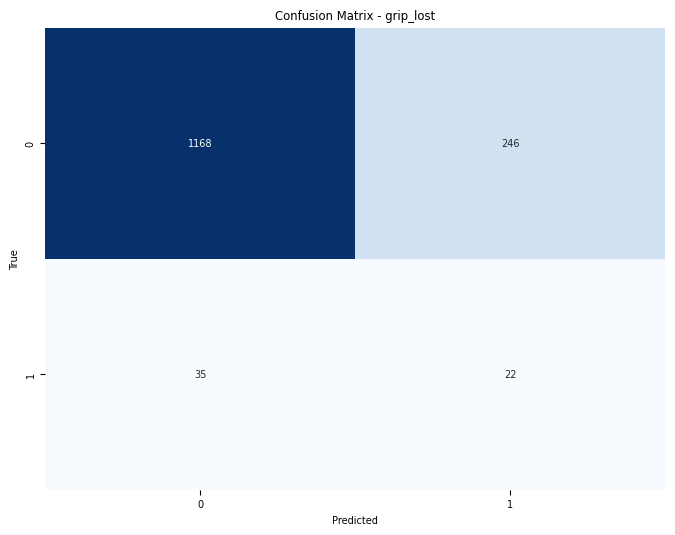

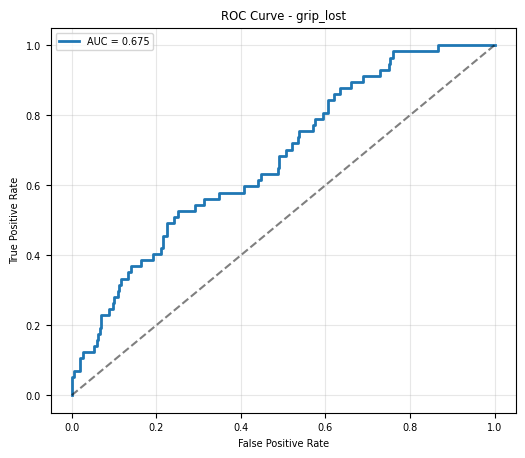

AUC-ROC: 0.6750

Hold-Out Validation for Robot_ProtectiveStop:
              precision    recall  f1-score   support

           0       0.99      0.59      0.74      1403
           1       0.10      0.90      0.17        68

    accuracy                           0.61      1471
   macro avg       0.54      0.75      0.46      1471
weighted avg       0.95      0.61      0.72      1471



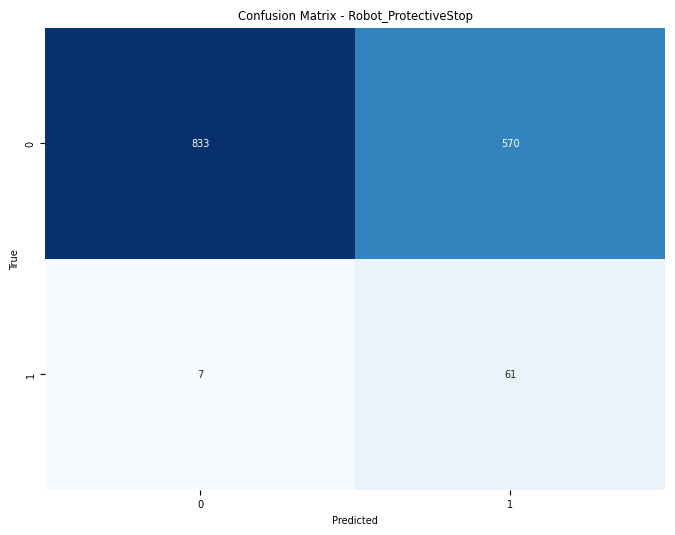

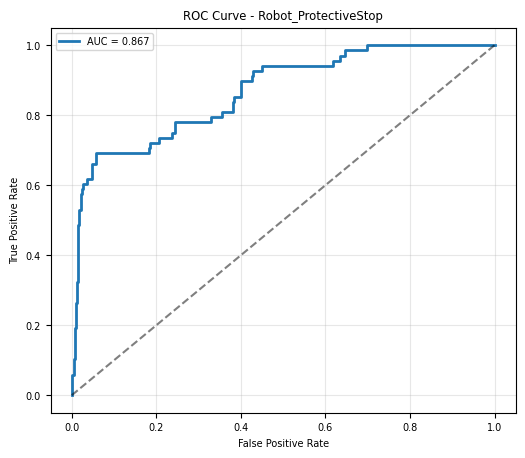

AUC-ROC: 0.8673

Cross Validation for grip_lost:
Model Performance (5-Fold Cross Validation):

fit_time: [0.00600052 0.00653553 0.00796223 0.00661016 0.00818396]

score_time: [0.00600314 0.0064888  0.00544739 0.00778913 0.00552773]

test_precision: [0.08208955 0.10408922 0.06521739 0.08064516 0.07727273]
Average test_precision: 0.08

test_recall: [0.38596491 0.5        0.34090909 0.47619048 0.38636364]
Average test_recall: 0.42

test_f1: [0.13538462 0.17230769 0.10948905 0.13793103 0.12878788]
Average test_f1: 0.14

Cross Validation for Robot_ProtectiveStop:
Model Performance (5-Fold Cross Validation):

fit_time: [0.00601101 0.0085206  0.0059979  0.00728106 0.00526357]

score_time: [0.00618601 0.00800204 0.00687718 0.00743961 0.00655127]

test_precision: [0.09667195 0.06942393 0.08580343 0.06435644 0.06766917]
Average test_precision: 0.08

test_recall: [0.89705882 0.88679245 0.91666667 0.82978723 0.9       ]
Average test_recall: 0.89

test_f1: [0.17453505 0.12876712 0.15691869 0.119448

In [32]:
gaussian_nb_pipeline_custom = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GaussianNaiveBayesClassifier())
])

hold_out_validation(gaussian_nb_pipeline_custom, X, y, plot_roc=True)
k_fold_cross_validation(gaussian_nb_pipeline_custom, X, y, k=5)

Hold-Out Validation for grip_lost:
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      1414
           1       0.08      0.39      0.14        57

    accuracy                           0.81      1471
   macro avg       0.53      0.61      0.51      1471
weighted avg       0.94      0.81      0.86      1471



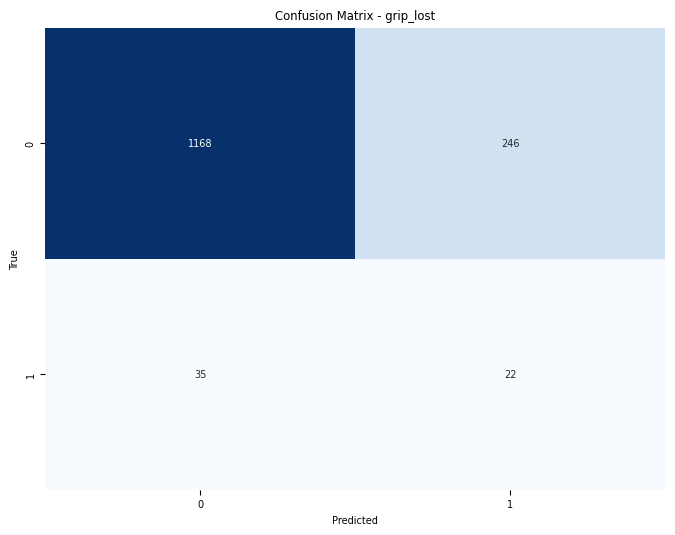

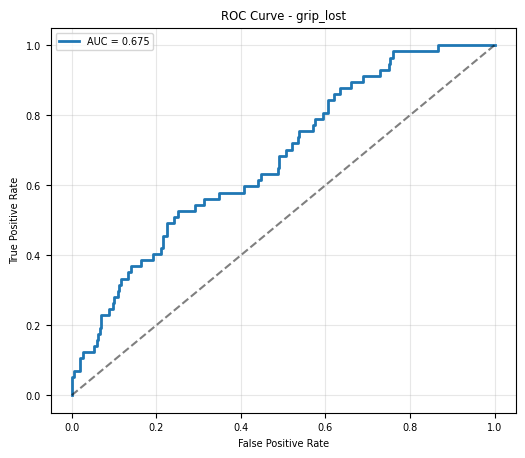

AUC-ROC: 0.6750

Hold-Out Validation for Robot_ProtectiveStop:
              precision    recall  f1-score   support

           0       0.99      0.59      0.74      1403
           1       0.10      0.90      0.17        68

    accuracy                           0.61      1471
   macro avg       0.54      0.75      0.46      1471
weighted avg       0.95      0.61      0.72      1471



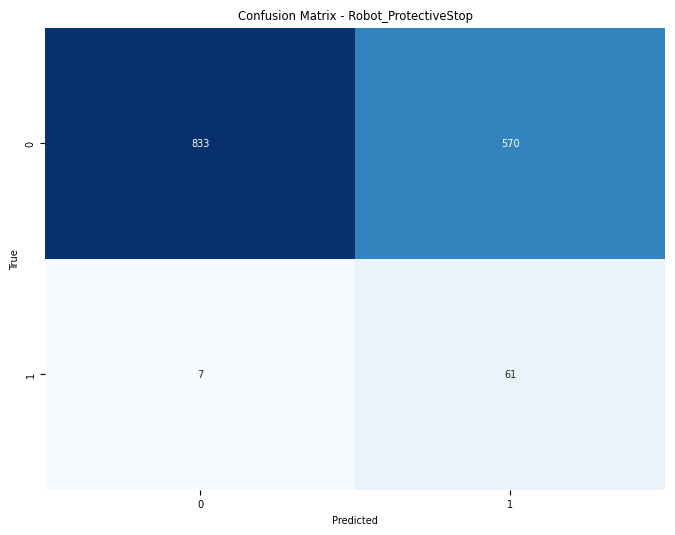

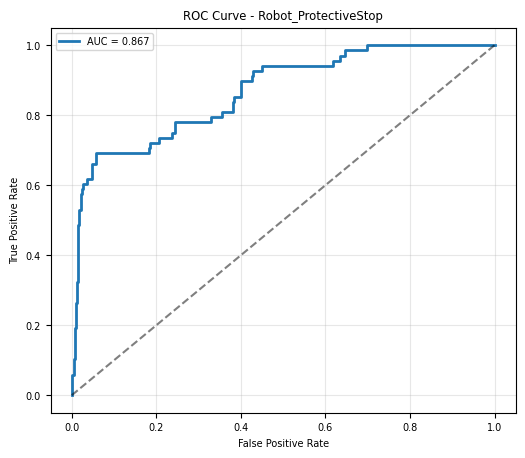

AUC-ROC: 0.8673

Cross Validation for grip_lost:
Model Performance (5-Fold Cross Validation):

fit_time: [0.01000023 0.00644732 0.00700855 0.00911021 0.00799942]

score_time: [0.00800157 0.01000094 0.00849986 0.00999475 0.00599718]

test_precision: [0.08208955 0.10408922 0.06521739 0.08064516 0.07727273]
Average test_precision: 0.08

test_recall: [0.38596491 0.5        0.34090909 0.47619048 0.38636364]
Average test_recall: 0.42

test_f1: [0.13538462 0.17230769 0.10948905 0.13793103 0.12878788]
Average test_f1: 0.14

Cross Validation for Robot_ProtectiveStop:
Model Performance (5-Fold Cross Validation):

fit_time: [0.00999594 0.08352351 0.15298271 0.02599978 0.01499653]

score_time: [0.00900364 0.01900506 0.01400375 0.01400065 0.03052402]

test_precision: [0.09667195 0.06942393 0.08580343 0.06435644 0.06766917]
Average test_precision: 0.08

test_recall: [0.89705882 0.88679245 0.91666667 0.82978723 0.9       ]
Average test_recall: 0.89

test_f1: [0.17453505 0.12876712 0.15691869 0.119448

In [33]:
gaussian_nb_pipeline_sklearn = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GaussianNB())
])

hold_out_validation(gaussian_nb_pipeline_sklearn, X, y, plot_roc=True)
k_fold_cross_validation(gaussian_nb_pipeline_sklearn, X, y, k=5)

### 3.4 Classification Trees

In [34]:
from sklearn.tree import DecisionTreeClassifier as DTClassifierSklearn
from supervised_learning.cart import DecisionTreeClassifier as DTClassifierCustom

Hold-Out Validation for grip_lost:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1414
           1       0.67      0.14      0.23        57

    accuracy                           0.96      1471
   macro avg       0.82      0.57      0.61      1471
weighted avg       0.95      0.96      0.95      1471



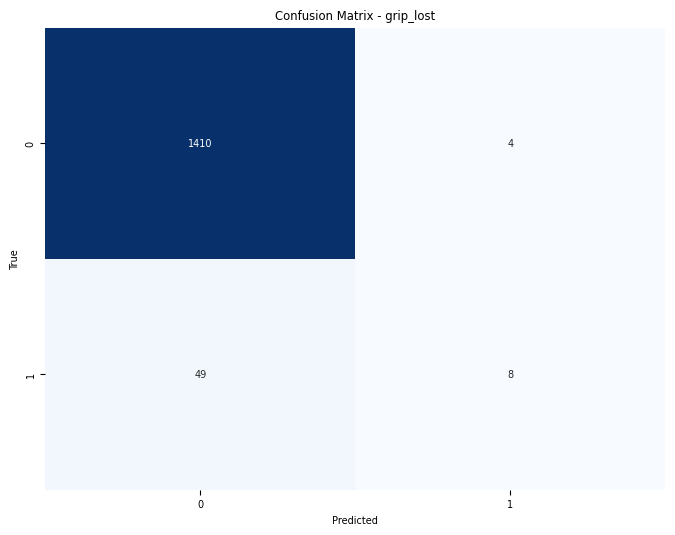

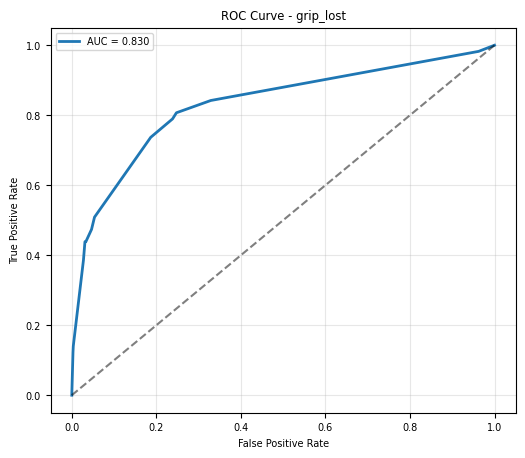

AUC-ROC: 0.8304

Hold-Out Validation for Robot_ProtectiveStop:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1403
           1       0.63      0.32      0.43        68

    accuracy                           0.96      1471
   macro avg       0.80      0.66      0.70      1471
weighted avg       0.95      0.96      0.95      1471



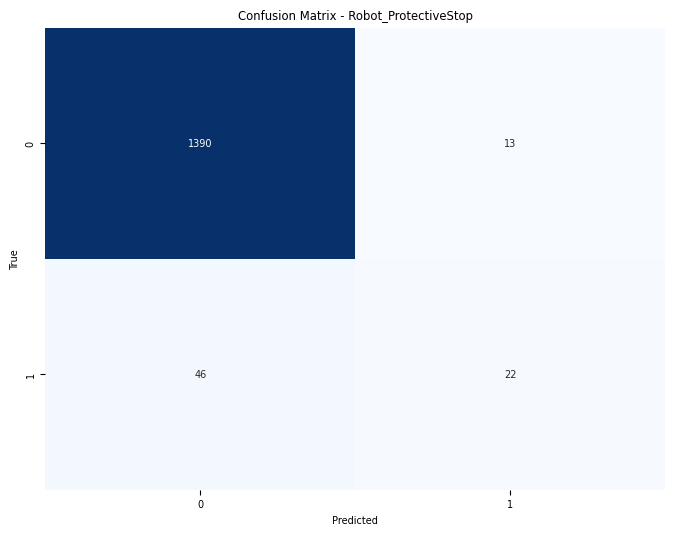

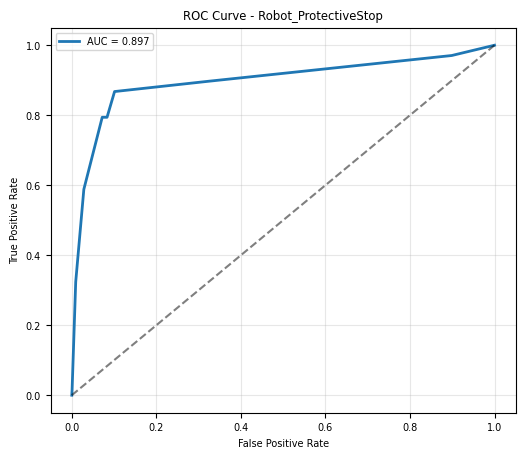

AUC-ROC: 0.8972

Cross Validation for grip_lost:
Model Performance (5-Fold Cross Validation):

fit_time: [5.67380977 5.30719376 6.25835562 5.10124445 6.04614472]

score_time: [0.00775766 0.00515938 0.00799727 0.01000285 0.00799942]

test_precision: [0.66666667 0.66666667 0.57142857 0.86956522 0.77777778]
Average test_precision: 0.71

test_recall: [0.14035088 0.39285714 0.18181818 0.47619048 0.31818182]
Average test_recall: 0.30

test_f1: [0.23188406 0.49438202 0.27586207 0.61538462 0.4516129 ]
Average test_f1: 0.41

Cross Validation for Robot_ProtectiveStop:
Model Performance (5-Fold Cross Validation):

fit_time: [6.94275331 5.06425071 4.9819932  5.01387405 4.50413823]

score_time: [0.00500464 0.00551748 0.00399828 0.0060029  0.00500059]

test_precision: [0.62857143 0.57142857 0.64705882 0.66666667 0.5       ]
Average test_precision: 0.60

test_recall: [0.32352941 0.1509434  0.18333333 0.12765957 0.32      ]
Average test_recall: 0.22

test_f1: [0.42718447 0.23880597 0.28571429 0.214285

In [35]:
decision_tree_pipeline_custom = Pipeline([
    # ('scaler', StandardScaler()),
    ('classifier', DTClassifierCustom())
])

hold_out_validation(decision_tree_pipeline_custom, X, y, plot_roc=True)
k_fold_cross_validation(decision_tree_pipeline_custom, X, y, k=5)

Hold-Out Validation for grip_lost:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1414
           1       0.44      0.47      0.45        57

    accuracy                           0.96      1471
   macro avg       0.71      0.72      0.72      1471
weighted avg       0.96      0.96      0.96      1471



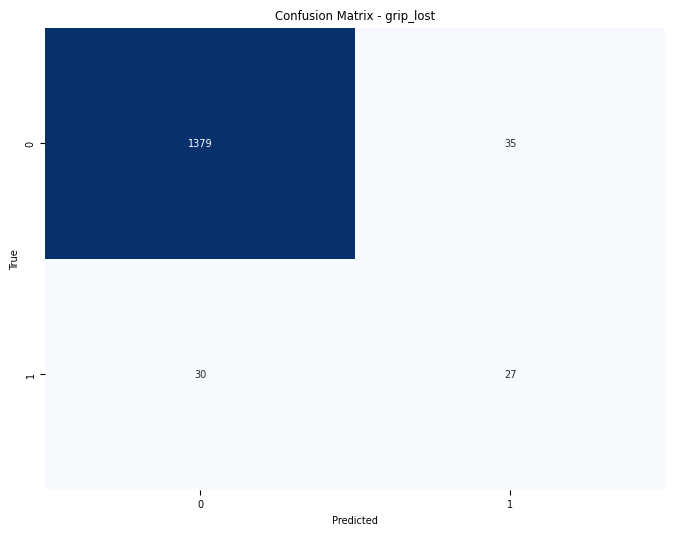

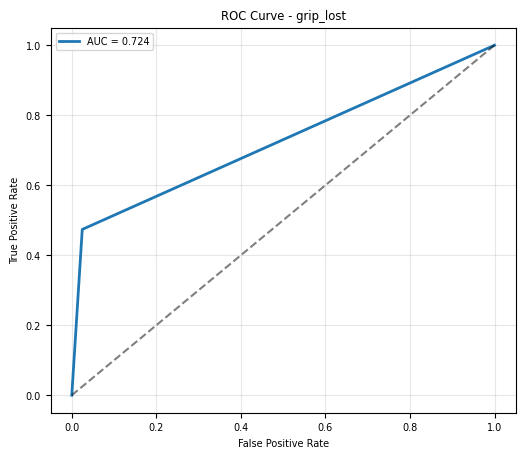

AUC-ROC: 0.7245

Hold-Out Validation for Robot_ProtectiveStop:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1403
           1       0.39      0.32      0.35        68

    accuracy                           0.95      1471
   macro avg       0.68      0.65      0.66      1471
weighted avg       0.94      0.95      0.94      1471



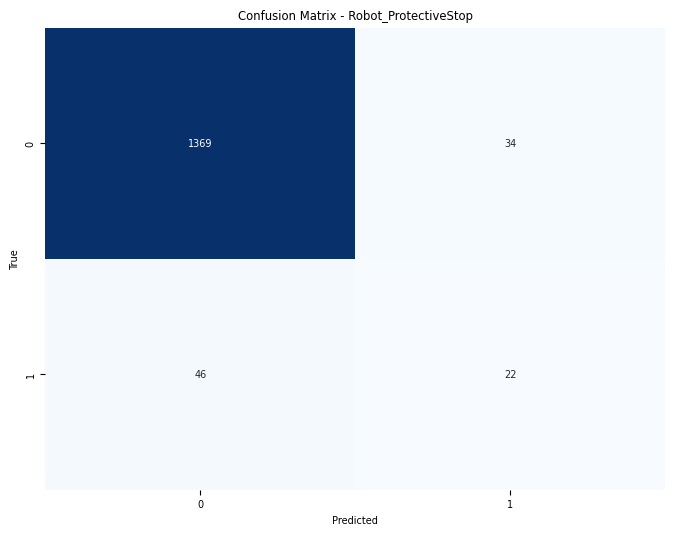

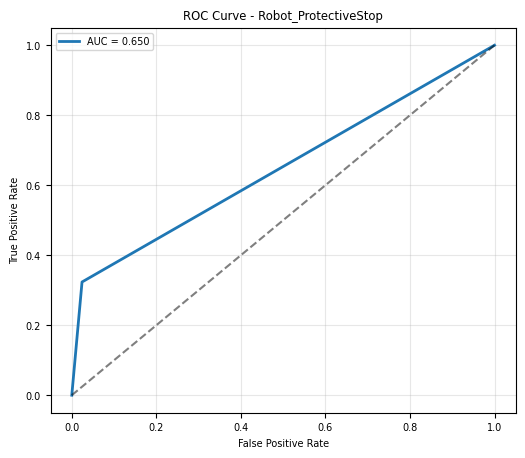

AUC-ROC: 0.6496

Cross Validation for grip_lost:
Model Performance (5-Fold Cross Validation):

fit_time: [0.10154057 0.08853054 0.09152937 0.09552622 0.10554409]

score_time: [0.00400615 0.00600147 0.00500751 0.00926852 0.00400233]

test_precision: [0.47540984 0.46       0.30909091 0.53571429 0.46808511]
Average test_precision: 0.45

test_recall: [0.50877193 0.41071429 0.38636364 0.71428571 0.5       ]
Average test_recall: 0.50

test_f1: [0.49152542 0.43396226 0.34343434 0.6122449  0.48351648]
Average test_f1: 0.47

Cross Validation for Robot_ProtectiveStop:
Model Performance (5-Fold Cross Validation):

fit_time: [0.10153627 0.1025424  0.10438323 0.14154387 0.10253525]

score_time: [0.00399971 0.00499916 0.00352001 0.00500178 0.00299382]

test_precision: [0.42592593 0.56603774 0.56451613 0.42222222 0.52272727]
Average test_precision: 0.50

test_recall: [0.33823529 0.56603774 0.58333333 0.40425532 0.46      ]
Average test_recall: 0.47

test_f1: [0.37704918 0.56603774 0.57377049 0.413043

In [36]:
decision_tree_pipeline_sklearn = Pipeline([
    # ('scaler', StandardScaler()),
    ('classifier', DTClassifierSklearn())
])

hold_out_validation(decision_tree_pipeline_sklearn, X, y, plot_roc=True)
k_fold_cross_validation(decision_tree_pipeline_sklearn, X, y, k=5)